## <center>CREDIT CARD CASE STUDY<center>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import re

In [89]:
customer=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Credit Card/Customer Acqusition.csv')
spend=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Credit Card/spend.csv')
repayment=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Credit Card/repayment.csv')

# Displaying the data

In [90]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [91]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [92]:
repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


## Sol 1

### 1(a)

In [93]:
customer.Age=pd.Series(np.where(customer.Age<18,customer.Age.mean(),customer.Age))

### 1(b)

In [94]:
cust_spend=pd.merge(left=spend,right=customer,on="Customer",how="inner")
cust_spend.head(2)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [95]:
cust_spend.Amount=pd.Series(np.where(cust_spend.Amount>cust_spend.Limit,0.5*cust_spend.Limit,cust_spend.Amount))

### 1(c)

In [96]:
repayment=repayment.loc[:1499,:"Amount"]
repayment.isna().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [97]:
repayment=repayment.fillna(1)

In [98]:
final=pd.merge(left=cust_spend,right=repayment,left_on=["Customer","Sl No:"],right_on=["Customer","SL No:"],how="inner")
final.head(3)

,Sl No:,Customer,Month_x,Type,Amount_x,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_y,Amount_y
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0,12-Jan-04,495414.75
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06


### x is spend,y is repayment

In [99]:
final.Amount_y=pd.Series(np.where(final.Amount_y>final.Limit,final.Limit,final.Amount_y))

## Sol 2 - Summaries

### 2(a)

In [100]:
final.Customer.nunique()

100

### 2(b)

In [101]:
final.Segment.value_counts()

Normal Salary    441
Govt             274
Self Employed    272
Salaried_Pvt     269
Salaried_MNC     244
Name: Segment, dtype: int64

In [102]:
len(final.Segment.value_counts())

5

### 2(c)

In [239]:
final['month_sp']=pd.to_datetime(final.Month_x).dt.month_name()
final['year_sp']=pd.to_datetime(final.Month_x).dt.year

In [240]:
sol2c=final.groupby(['year_sp','month_sp']).Amount_x.mean()
sol2c

year_sp  month_sp 
2004     April        124621.976429
         February     136998.280000
         January      144233.915179
         March        133708.090714
         May          153326.954286
         November      79642.078571
         September    171579.263571
2005     April        146430.918929
         August       141707.435357
         December      84416.000000
         February     154334.423869
         January      192271.670714
         July         120803.091429
         June         190726.475714
         May          154625.803000
         November     178120.211667
         October       89879.421429
         September    109423.776429
2006     April        134743.702447
         August       213863.917857
         December     150129.360714
         February     148478.986905
         January      136312.515714
         July         189088.681071
         June         155971.498571
         March        131720.289032
         May          143693.687143
         

### 2(d)

In [241]:
final['month_rep']=pd.to_datetime(final.Month_y).dt.month_name()
final['year_rep']=pd.to_datetime(final.Month_y).dt.year

In [242]:
sol2d=final.groupby(['year_rep','month_rep']).Amount_y.mean()
sol2d

year_rep  month_rep
2004      April        175632.658000
          February     125612.505556
          January      159971.502571
          March        177767.948000
          May          151310.396400
          November     119226.575333
          September    118926.025625
2005      April        121163.452000
          August       149984.104865
          December     179119.050833
          February     157356.791358
          January      181260.750000
          July         149944.928333
          June          97052.375833
          May          200121.848636
          November     169225.884048
          October      136268.268333
          September     73559.961667
2006      April        180529.321556
          August       161553.497500
          December     201158.939167
          February     188198.167436
          January      204422.038333
          July         170152.780811
          June         165429.070000
          March        154861.950196
          May     

### 2(e)

In [243]:
monthly_prft=pd.Series(sol2d-sol2c)
sol2e=monthly_prft[monthly_prft>0]
sol2e=0.029*sol2e
sol2e

year_rep  month_rep
2004      April        1479.309766
          January       456.390034
          March        1277.735861
          November     1147.950406
2005      August        240.023416
          December     2746.388474
          February       87.648657
          July          845.113270
          May          1319.385323
          October      1345.276560
2006      April        1327.782954
          December     1479.857775
          February     1151.856235
          January      1975.176156
          June          274.269571
          March         671.108174
          May           799.722360
          November       37.155474
          October       922.585759
          September    1642.342276
dtype: float64

### 2(f)

In [244]:
top5_prod_types=final.groupby('Type').Amount_x.sum().sort_values(ascending=False).head(5)
top5_prod_types

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount_x, dtype: float64

### 2(g)

In [245]:
max_spend_city=final.groupby('City').Amount_x.sum().sort_values(ascending=False).reset_index().head(1)
max_spend_city

,City,Amount_x
0,COCHIN,45963513.5


### 2(h)

In [246]:
final['age_grp']=pd.cut(final.Age,bins=(0,18,30,60,80),labels=['0-18','19-30','31-60','61-80'])
final.head(3)

,Sl No:,Customer,Month_x,Type,Amount_x,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_y,Amount_y,month_sp,year_sp,month_rep,year_rep,age_grp
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0,12-Jan-04,495414.75,January,2004,January,2004,61-80
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,January,2004,January,2004,61-80
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,January,2004,January,2004,61-80


In [247]:
final.groupby('age_grp').Amount_x.sum().sort_values(ascending=False)

age_grp
31-60    1.240806e+08
19-30    5.268990e+07
61-80    4.301063e+07
0-18     0.000000e+00
Name: Amount_x, dtype: float64

#### Clearly, age group '31-60' is spending more money

### 2(i)

In [248]:
rep_top10_cust=final.groupby('Customer').Amount_y.sum().sort_values(ascending=False).head(10)
rep_top10_cust

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount_y, dtype: float64

## Sol 3

In [249]:
sol3=pd.DataFrame(final.groupby(['year_sp','City','Product']).Amount_x.sum()).reset_index()
sol3

,year_sp,City,Product,Amount_x
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platimum,1112732.30
2,2004,BANGALORE,Silver,1291852.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platimum,897264.94
...,...,...,...,...
67,2006,PATNA,Platimum,1256137.65
68,2006,PATNA,Silver,700005.00
69,2006,TRIVANDRUM,Gold,2735710.87
70,2006,TRIVANDRUM,Platimum,2147403.75


In [250]:
graph_rep=sol3.pivot_table(index=['City','year_sp'],columns='Product',values='Amount_x')
graph_rep

Product                    Gold    Platimum      Silver
City       year_sp                                     
BANGALORE  2004      9289878.54  1112732.30  1291852.58
           2005     12892362.99   912284.97   830612.34
           2006     12030611.09   685831.27  1415480.94
BOMBAY     2004      6987853.53   897264.94   532089.03
           2005      8983018.28   711804.94   508988.54
           2006      7917144.31   972130.01  1092833.80
CALCUTTA   2004      7477140.98  2037690.30   500006.00
           2005     10303355.80  4434696.31   440147.06
           2006     11167532.77  3589606.66  1157956.42
CHENNAI    2004      1059618.50  3535652.38   282056.86
           2005      3740945.58  5053956.32   377184.49
           2006      2704288.62  5024923.40   350009.50
COCHIN     2004      7315850.15  3419904.07   814229.62
           2005     12110613.03  4960921.71   652269.38
           2006     10499142.38  4920592.29  1269990.87
DELHI      2004      2806495.00   283512.89   768172.30
           2005      1964845.27   494157.86   612311.21
           2006      2957103.32   176788.72   854899.97
PATNA      2004      2072567.90  1113069.60   756684.10
           2005      3252615.77  2883231.07   950094.19
           2006      2276181.69  1256137.65   700005.00
TRIVANDRUM 2004      2415102.84  2161676.67   209667.48
           2005      1240375.85  3601443.30   269912.99
           2006      2735710.87  2147403.75   555862.12

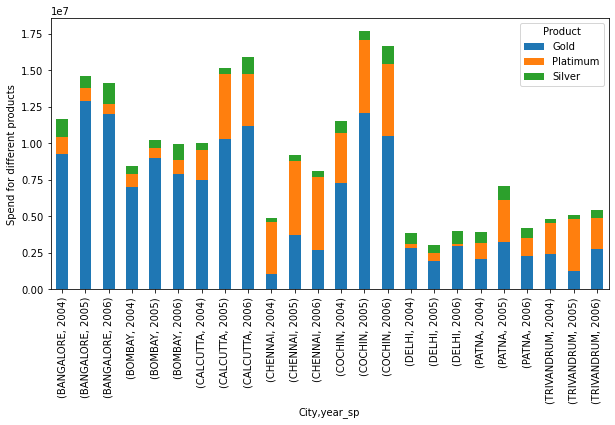

In [251]:
graph_rep.plot(kind='bar',figsize=(10,5),stacked=True)
plt.ylabel('Spend for different products')
plt.show()

## Sol 4 - Graphs

### 4(a)

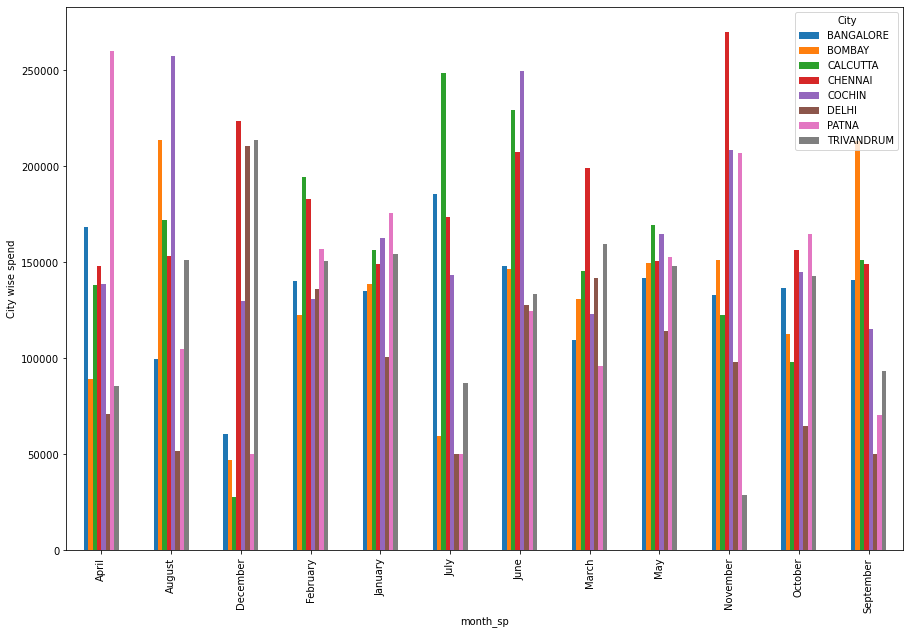

In [252]:
final.pivot_table(index='month_sp',columns='City',values='Amount_x').plot(kind='bar',figsize=(15,10))
plt.ylabel('City wise spend')
plt.show()

### 4(b)

In [253]:
sol4b=final[final.Type=='AIR TICKET']

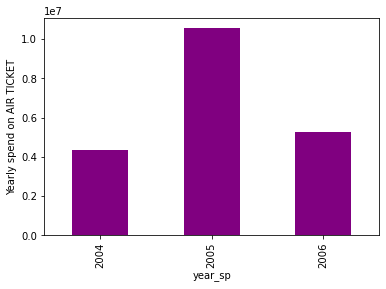

In [254]:
sol4b.groupby('year_sp').Amount_x.sum().plot(kind='bar',color='purple')
plt.ylabel('Yearly spend on AIR TICKET')
plt.show()

### 4(c)

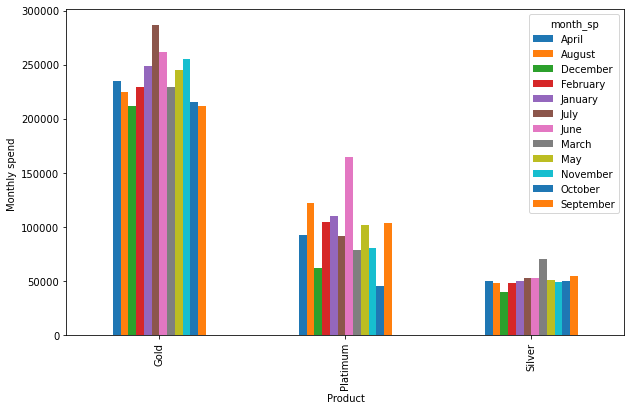

In [255]:
final.pivot_table(index='Product',columns='month_sp',values='Amount_x').plot(kind='bar',figsize=(10,6))
plt.ylabel('Monthly spend ')
plt.show()

### We can see that spends are highest for 'Gold' and least for 'Silver' while 'Platimum' has abrupt spend in various months. In mid of the year spends are high for each product around june and july

## Sol5

In [266]:
def top10(prod,time_period):
    if prod=="Gold" and time_period=="month_rep":
        Sol5_data=final.groupby(["Product","City","month_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Gold"].sort_values("Amount_y",ascending=False).head(10)
    elif prod=="Gold" and time_period=="year_rep":
        Sol5_data=final.groupby(["Product","City","year_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Gold"].sort_values("Amount_y",ascending=False).head(10)
    elif prod=="Silver" and time_period=="year_rep":
        Sol5_data=final.groupby(["Product","City","year_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Silver"].sort_values("Amount_y",ascending=False).head(10)                                                                             
    elif prod=="Silver" and time_period=="month_rep":
        Sol5_data=final.groupby(["Product","City","month_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Silver"].sort_values("Amount_y",ascending=False).head(10) 
    elif prod=="Platimum" and time_period=="month_rep":
        Sol5_data=final.groupby(["Product","City","month_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Platimum"].sort_values("Amount_y",ascending=False).head(10)    
    elif prod=="Platimum" and time_period=="year_rep":
        Sol5_data=final.groupby(["Product","City","year_rep"]).Amount_y.sum().reset_index()
        result=Sol5_data[Sol5_data.Product=="Platimum"].sort_values("Amount_y",ascending=False).head(10)    
        
    return result    
        
top10("Gold","month_rep")        
    
        

,Product,City,month_rep,Amount_y
4,Gold,BANGALORE,January,8373392.04
8,Gold,BANGALORE,May,7613096.85
31,Gold,CALCUTTA,May,7583449.60
45,Gold,COCHIN,April,6588454.89
49,Gold,COCHIN,January,6441125.96
3,Gold,BANGALORE,February,6399922.02
27,Gold,CALCUTTA,January,6083577.48
53,Gold,COCHIN,May,5946681.83
16,Gold,BOMBAY,January,5495004.58
20,Gold,BOMBAY,May,5494523.84


### user has to enter time period with'_rep' for repayment for example, month_rep and year_rep